In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Intellipaat/ML_2nd_July/50_Startups.csv')

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
df['State'].value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

Text(0, 0.5, 'Profit')

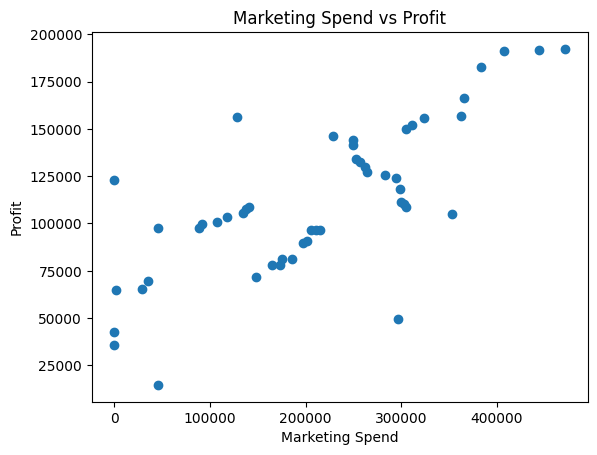

In [ ]:
plt.scatter(df['Marketing Spend'], df['Profit'])
plt.title('Marketing Spend vs Profit')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')

In [ ]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

Text(0, 0.5, 'Profit')

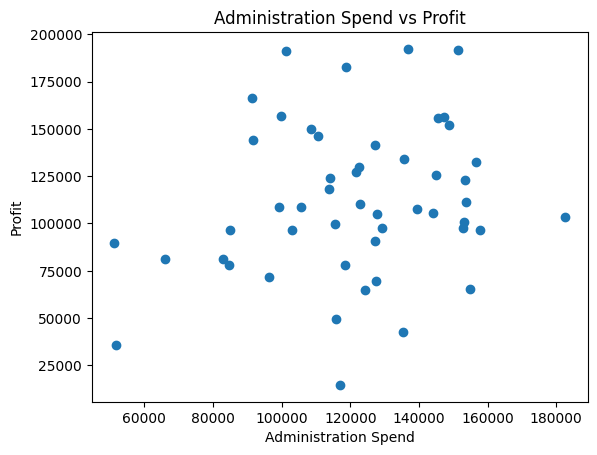

In [ ]:
plt.scatter(df['Administration'], df['Profit'])
plt.title('Administration Spend vs Profit')
plt.xlabel('Administration Spend')
plt.ylabel('Profit')

<ipython-input-11-a6521ca89be7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Administration'])


<Axes: xlabel='Administration', ylabel='Density'>

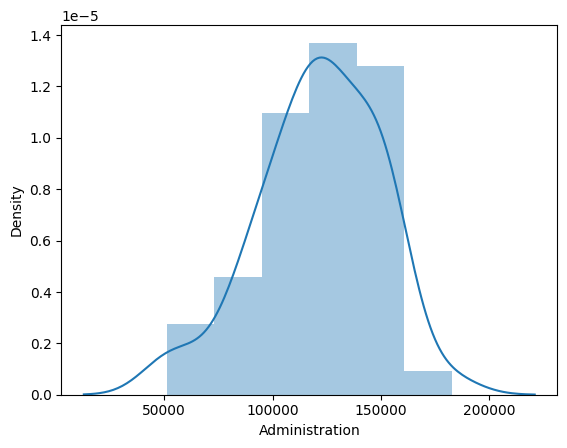

In [ ]:
sns.distplot(df['Administration'])

Text(0, 0.5, 'Profit')

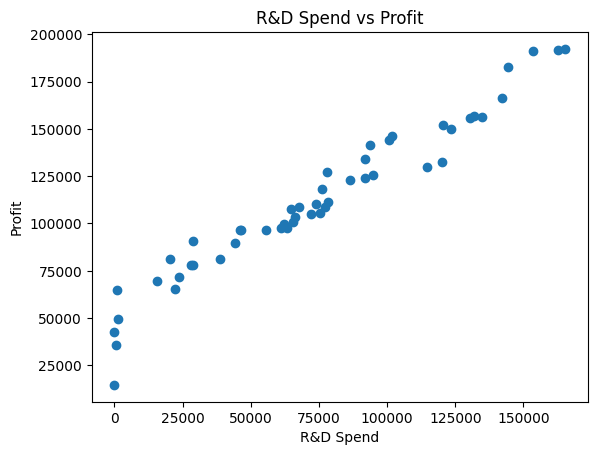

In [ ]:
plt.scatter(df['R&D Spend'], df['Profit'])
plt.title('R&D Spend vs Profit')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')

In [ ]:
df['State'].value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

In [ ]:
df['NY'] = np.where(df['State'] == 'New York', 1, 0)
df['CL'] = np.where(df['State'] == 'California', 1, 0)
df['FL'] = np.where(df['State'] == 'Florida', 1, 0)

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,NY,CL,FL
0,165349.20,136897.80,471784.10,New York,192261.83,1,0,0
1,162597.70,151377.59,443898.53,California,191792.06,0,1,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,0,1
3,144372.41,118671.85,383199.62,New York,182901.99,1,0,0
4,142107.34,91391.77,366168.42,Florida,166187.94,0,0,1


In [ ]:
df.drop(columns = ['State'], axis = 1, inplace = True)

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,NY,CL
0,165349.20,136897.80,471784.10,192261.83,1,0
1,162597.70,151377.59,443898.53,191792.06,0,1
2,153441.51,101145.55,407934.54,191050.39,0,0
3,144372.41,118671.85,383199.62,182901.99,1,0
4,142107.34,91391.77,366168.42,166187.94,0,0


In [ ]:
df.drop(columns = ['FL'], axis = 1, inplace = True)

In [ ]:
Target = 'Profit'

In [ ]:
df1 = df.drop(columns = [Target], axis = 1)
independent_var = df1.columns

In [ ]:
X = df[independent_var].values
y = df[Target].values

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 57)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.fit_transform(Xtest)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(Xtrain, ytrain)

LinearRegression()

In [ ]:
regressor.intercept_

46862.37652416492

In [ ]:
independent_var

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'NY', 'CL'], dtype='object')

In [ ]:
regressor.coef_

array([134558.50702104,  -1174.05224979,  11624.38047659,   -315.93662695,
          251.51163187])

In [ ]:
y_pred_train = regressor.predict(Xtrain)

In [ ]:
y_pred_train

array([108841.70732405, 110636.80679209,  46756.04713507, 160034.61759046,
       113244.15764435,  97565.43336886, 172873.81746637,  88753.92644954,
       115959.70549159, 181336.1310307 , 127448.62457714, 128723.43900448,
        73314.85039598, 191964.14596633, 102351.06044781, 116807.80196905,
        59360.14915282, 149849.71890576, 128230.83778559,  54676.77313863,
       102347.35840021,  46361.85272448, 171170.65751411, 158951.36655589,
        74466.86200674,  64934.68198148, 189475.97679687,  69597.77122249,
       112278.27628034, 134830.57139209, 151449.06241199,  87831.94763971,
       129701.02240349,  74170.08090454,  89137.51177066,  47639.71603447,
        46983.44008648, 162372.59077007, 113912.4680636 , 145556.31340365])

In [ ]:
ytrain

array([108733.99, 105733.54,  64926.08, 155752.6 , 105008.31,  97483.56,
       182901.99,  96479.51, 122776.86, 191050.39, 134307.35, 141585.52,
        77798.83, 192261.83, 103282.38, 111313.02,  69758.98, 132602.65,
       124266.9 ,  49490.75, 107404.34,  42559.73, 166187.94, 156122.51,
        90708.19,  65200.33, 191792.06,  71498.49, 108552.04, 144259.4 ,
       152211.77,  89949.14, 125370.37,  78239.91,  96712.8 ,  14681.4 ,
        35673.41, 156991.12, 110352.25, 129917.04])

In [ ]:
y_pred_test = regressor.predict(Xtest)

In [ ]:
y_pred_test

array([107331.88008109, 130923.57891836, 131574.3987113 , 192720.68092253,
        76592.77007835,  52795.57939297, 102612.37443758, 102720.62710391,
       161082.30670804,  99951.9815377 ])

In [ ]:
ytest

array([101004.64, 118474.03, 126992.93, 149759.96,  81005.76,  81229.06,
        97427.84,  99937.59, 146121.95,  96778.92])

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
mean_squared_error(y_pred_train, ytrain)

87500778.78754064

In [ ]:
r2_score(y_pred_train, ytrain)

0.9504371681223699

In [ ]:
mean_squared_error(y_pred_test, ytest)

315808121.7739042

In [ ]:
r2_score(y_pred_test, ytest)

0.7839806907080342